In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn import metrics
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score


In [2]:
df1 = pd.read_csv('Dataset_Hackathon.csv')
df1.head()

,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176


In [3]:
# Features
X1 = df1.drop(['Country','Commodity','Flow','Category'], axis = 1)
X1.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,34,12,5940.830501,4840.697837
1,23,12,5940.830501,3069.710823
2,11,12,5940.830501,1475.822511
3,50,12,5940.830501,7083.948054
4,71,12,5940.830501,9976.560176


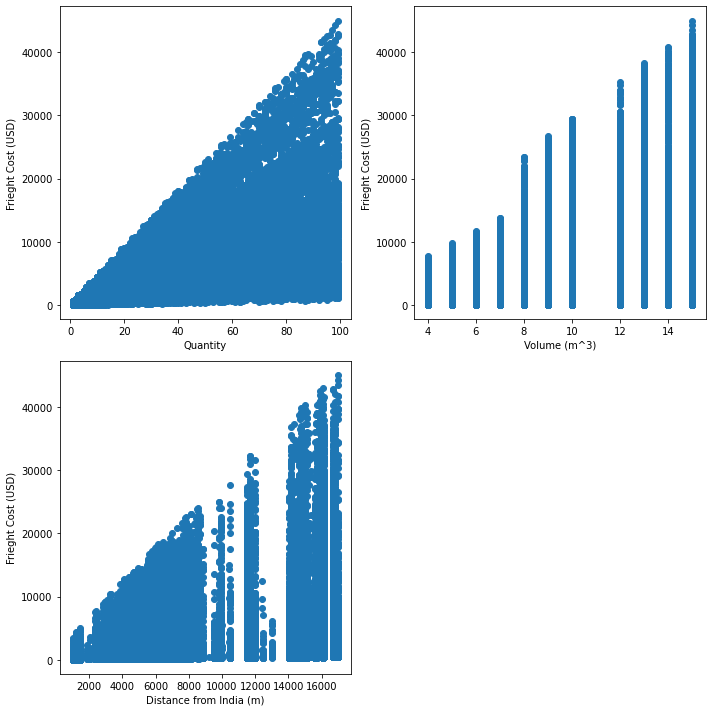

In [4]:
columns = X1.drop("Frieght Cost (USD)", axis="columns").columns
halfcol = math.ceil(len(columns)/2)
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(halfcol, halfcol, i+1)
    column = columns[i]
    plt.xlabel(column)
    plt.ylabel("Frieght Cost (USD)")
    plt.scatter(X1[column], X1["Frieght Cost (USD)"])

fig.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = X1.drop("Frieght Cost (USD)", axis="columns")
Y = X1["Frieght Cost (USD)"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
mymodel = linear_model.Lasso()
mymodel.fit(X_train, Y_train)

Lasso()

In [7]:
mymodel.coef_

array([1.36754345e+02, 4.85875506e+02, 3.61951961e-01])

In [8]:
mymodel.intercept_

-7633.940257616387

In [9]:
mymodel.predict(X_test)

array([ 5137.13475588,  3312.1565719 ,  9776.53054678, ...,
        3148.90360897, 11906.93628455,  2295.2316171 ])

In [10]:
Y_test

32573     2134.024072
72332     1459.856279
29792     6711.530118
27839      461.803932
78927      376.705863
             ...     
7814      1707.219257
53047     2112.562715
12647      570.524114
33083    14917.333833
18632      691.967794
Name: Frieght Cost (USD), Length: 32578, dtype: float64

In [11]:
mymodel.score(X_test,Y_test)

0.7025218057439002

In [12]:
mymodel.predict([[34,12,5940.83050148322]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([4996.5088008])

In [13]:
mymodel.predict([[3,12,5940.83050148322]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([757.12409868])

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
lasso = Lasso()

In [16]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Distance from India (m)']),
                                       remainder = 'passthrough')
                                       

In [17]:
scaler = StandardScaler()

In [18]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [19]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Distance from India '
                                                   '(m)'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [20]:
Y_pred_lasso = pipe.predict(X_test)
r2_score(Y_test,Y_pred_lasso)

0.7081567459861597

In [21]:
Y_pred_lasso

array([ 5509.75723577,  2514.33723481,  9528.18631685, ...,
        3402.11140911, 11912.01929567,  2278.19309124])

In [22]:
arr=np.array([ 5509.75723577,  2514.33723481,  9528.18631685, ...,
        3402.11140911, 11912.01929567,  2278.19309124])

In [25]:
X_test

,Quantity,Volume (m^3),Distance from India (m)
32573,5,13,15943.888517
72332,47,7,3087.465141
29792,69,14,3238.451579
27839,3,8,6735.016571
78927,1,4,15818.502114
...,...,...,...
7814,6,10,15943.888517
53047,18,6,16165.263816
12647,1,10,15989.233629
33083,76,13,7821.935046


In [26]:
y_hats2 = Y_pred_lasso

X_test['y_hats'] = y_hats2

In [27]:
X_test

,Quantity,Volume (m^3),Distance from India (m),y_hats
32573,5,13,15943.888517,5509.757236
72332,47,7,3087.465141,2514.337235
29792,69,14,3238.451579,9528.186317
27839,3,8,6735.016571,-612.146221
78927,1,4,15818.502114,-402.907396
...,...,...,...,...
7814,6,10,15943.888517,4166.906576
53047,18,6,16165.263816,3912.799640
12647,1,10,15989.233629,3402.111409
33083,76,13,7821.935046,11912.019296


In [28]:
X_test.to_csv(r'my_data.csv', index=False)